In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread
from skimage.color import rgba2rgb

import torch
import torchvision.transforms as T

print('PyTorch version:')
print(torch.__version__)
if torch.cuda.is_available():
    print('GPU available:')
    print(torch.cuda.get_device_name(0))
    device = torch.device('cuda')
else:
    print('GPU unavailable')
    device = torch.device('cpu')

PyTorch version:
2.2.1+cu121
GPU available:
Tesla P100-PCIE-16GB


It should work for other versions of pytorch

In [2]:
# Read target image, make sure it is an RGB image
target_array = rgba2rgb(imread('target.png')) 
# Convert to torch tensor, and reshape it into (1,3,H,W)
target_tensor = T.ToTensor()(target_array)
target_tensor = torch.unsqueeze(target_tensor,0)
target_tensor = target_tensor.to(device) # optional
print(target_tensor.shape)

torch.Size([1, 3, 500, 500])


In [3]:
# Read test images, make sure they are RGB images
sources_array = [rgba2rgb(imread('source'+str(i)+'.png')) for i in range(1,4)]
# Convert to torch tensor
sources_tensor = [T.ToTensor()(img) for img in sources_array]
sources_tensor = torch.stack(sources_tensor)
sources_tensor = sources_tensor.to(device)
print(sources_tensor.shape)

torch.Size([3, 3, 250, 250])


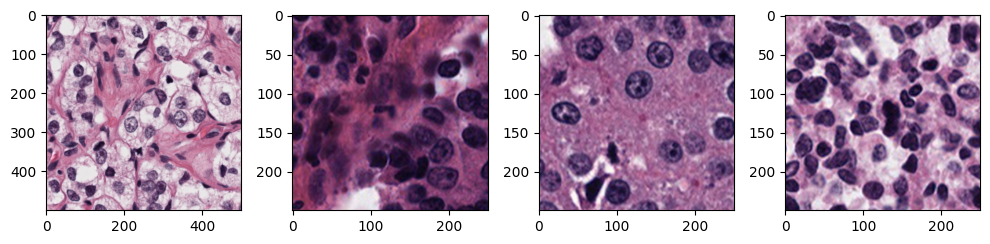

In [4]:
# Show target and test images
fig,ax = plt.subplots(1,4,figsize=(10,8))
ax[0].imshow(target_array)
ax[1].imshow(sources_array[0])
ax[2].imshow(sources_array[1])
ax[3].imshow(sources_array[2])

plt.tight_layout()
plt.show()

In [5]:
from torch_macenko import Macenko_Normalizer

In [6]:
stainnorm = Macenko_Normalizer()
stainnorm.fit(target_tensor)
transformed = stainnorm.transform(sources_tensor)

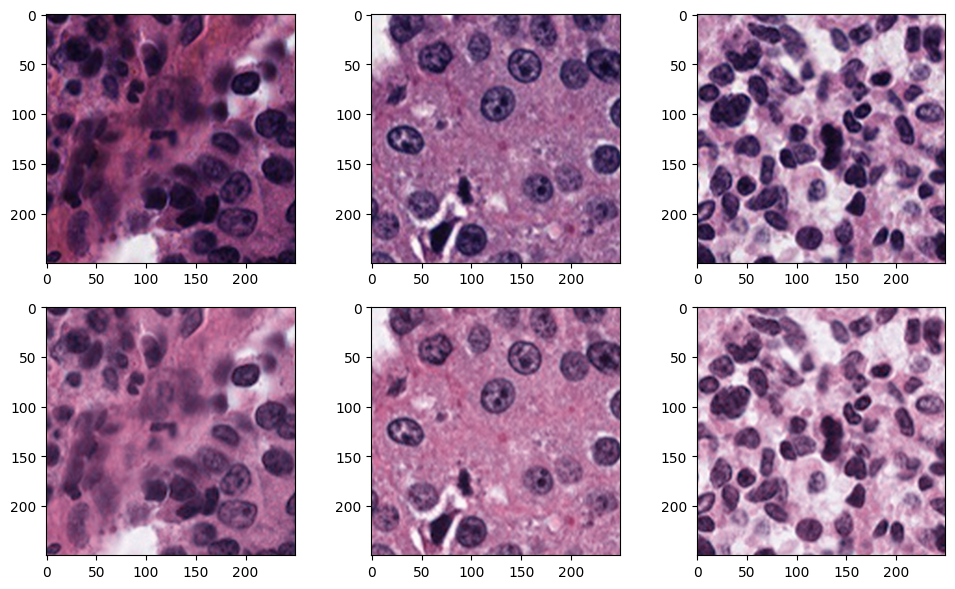

In [7]:
# compare
fig,ax = plt.subplots(2,3,figsize=(10,6))
ax[0,0].imshow(sources_array[0])
ax[0,1].imshow(sources_array[1])
ax[0,2].imshow(sources_array[2])

ax[1,0].imshow(transformed[0].cpu().numpy().transpose(1,2,0))
ax[1,1].imshow(transformed[1].cpu().numpy().transpose(1,2,0))
ax[1,2].imshow(transformed[2].cpu().numpy().transpose(1,2,0))

plt.tight_layout()
plt.show()

Let me know if you find a failed case, or if you have any ideas to improve the algorithm!